# TD 2 | Analyse et visualisation de données avec numpy, pandas et matplotlib


Objectifs du TD :

* découvrir la visualisation de données avec matplotlib
* approfondir la maîtrise de numpy et pandas
* effectuer une première analyse exploratoire de données (EDA)
* découvrir la librairie de machine learning (ML) scikit-learn
* appliquer des techniques basiques d'apprentissage non supervisé pour visualiser et classifier des données (PCA, $k$-means)

---

## 1. Exploratory Data Analysis (EDA) avec matplotlib

<img src="./rc/matplotlib.png" />

La librairie la plus couramment utilisée pour visualiser des données en Python est matplotlib (https://matplotlib.org/). D'autres librairies très utilisées et permettant certaines fonctionnalités plus avancées sont plotly (https://plot.ly/python/), bokeh (https://bokeh.pydata.org/en/latest/) ou encore seaborn (https://seaborn.pydata.org/). Nous allons dans un premier temps découvrir la première, matplotlib.

Le contexte permettant de tracer des graphes est `matplotlib.pyplot`, que l'on abrège souvent par `plt`, comme ci-dessous :

In [1]:
import matplotlib.pyplot as plt

**La documentation de pyplot : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot**

Découvrons les différents types de graphes en pratique, à l'aide du fichier `Vol010.csv`.

### Chargement des données de vol

In [2]:
!git clone https://github.com/MadaneA/TDs-statistiques-descriptives.git

fatal: destination path 'TDs-statistiques-descriptives' already exists and is not an empty directory.


In [3]:
import os
os.getcwd()

'/home/cantez93800/venv_jupyter'

In [4]:
import os
os.chdir('TDs-statistiques-descriptives')

In [5]:
import pandas as pd
import numpy as np

In [6]:
# Ne pas modifier
vol = pd.read_csv("./data/Vol010.csv").drop(0).dropna(how='any').iloc[::10] # On ne garde qu'un point sur 10 pour limiter les points à affichervol
vol.index = np.arange(vol.shape[0])
vol['t'] = pd.to_datetime(vol['t'])
vol[vol.columns[1:]] = vol[vol.columns[1:]].apply(pd.to_numeric)
vol['FLIGHT_MOD'] = vol['FLIGHT_MOD'].apply(int)

/tmp/ipykernel_7516/4137122529.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  vol['t'] = pd.to_datetime(vol['t'])


In [7]:
vol.dtypes

t             datetime64[ns]
EGT_SEL              float64
FLIGHT_MOD             int64
FMV_SEL              float64
HPTC_SEL             float64
LPTC_SEL             float64
N1_SEL               float64
N2_ACTSEL            float64
OIL_P                float64
OIL_TEMP             float64
PS3_SEL              float64
PT2_SEL              float64
P0_SEL               float64
TAT                  float64
TBV_SEL              float64
TRA_SEL              float64
T25_SEL              float64
T3_SEL               float64
VBV_SEL              float64
VIB_CN1              float64
VIB_CN2              float64
VIB_TN1              float64
VIB_TN2              float64
VSV_SEL              float64
WFM_SEL              float64
XM                   float64
dtype: object

In [8]:
print(vol.shape)
vol.head()

(2283, 26)


,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
0,2011-09-15 14:26:02.875,335.984000,1,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15
1,2011-09-15 14:26:05.375,72.000600,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
2,2011-09-15 14:26:07.875,72.001100,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
3,2011-09-15 14:26:10.375,527.978000,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15
4,2011-09-15 14:26:12.875,-0.001335,1,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15


### Line/Scatter plot : Visualisation d'un vol avec `plt.plot`

La méthode `plt.plot(x=..., y=..., options)` permet de visualiser des points sur un graphique. La commande ci-dessous affiche la valeur d'une variable au cours du temps. 

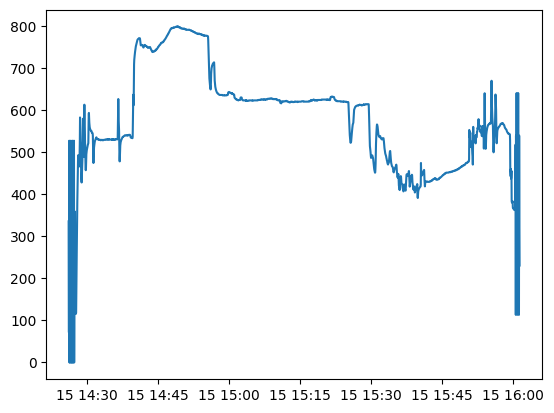

In [9]:
plt.plot(vol['t'], vol['EGT_SEL'])

Il est possible de superposer deux graphes en appelant plusieurs points plt.plot(). De plus, plot() peut recevoir une grande quantité d'options pour personnaliser l'aspect de la courbe :

- ligne ou points
- type de marqueur
- couleurs, taille/épaisseur de trait
- ...

Certaines options peuvent être combinées et exprimées sous forme de chaîne de caractère. Par exemple, 'b^--' signifie "marqueurs bleus en forme de triangles, reliés par un trait pointillé".

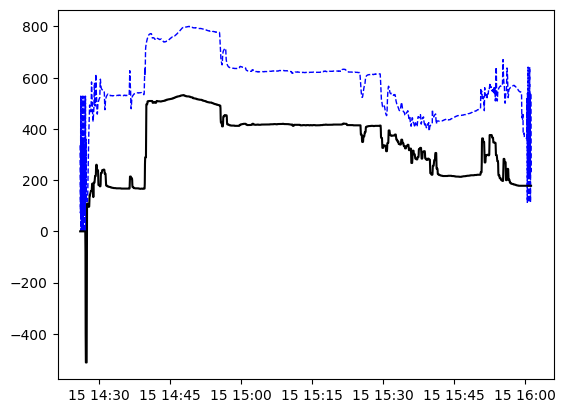

In [10]:
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')

Il est possible de visualiser plusieurs graphiques de manière juxtaposée. La méthode utilisée est plt.subplot().
Ses paramètres sont : le nombre de lignes, le nombre de colonnes, et le sous-plot sur lequel vous vous trouvez. 

Ainsi, dans plt.subplot(1, 2, 1); 1, 2, 1 signifie "une figure à 1 ligne et 2 colonnes : allez au premier sous-plot". Ensuite, 1, 2, 2 signifie "une figure à 1 ligne et 2 colonnes : passez au deuxième sous-plot"

plt.figure(figsize=(x,y)) permet de définir la taille des plots, avec x : longueur et y: largeur.

plt.xlim(inf,sup) et plt.ylim(inf,sup) permettent de fixer la borne inférieur et supérieur respectivement de l'axe x et l'axe y.

(-600.0, 850.0)

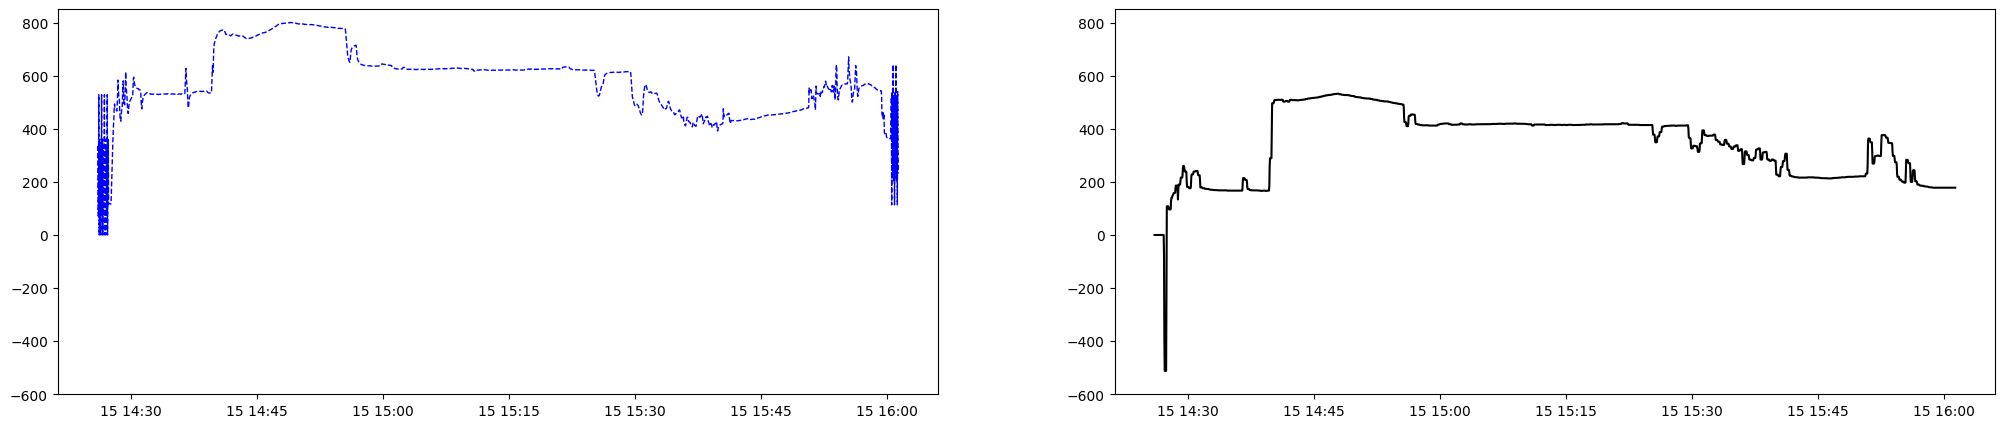

In [11]:
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.ylim(-600,850)

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')
plt.ylim(-600,850)
         

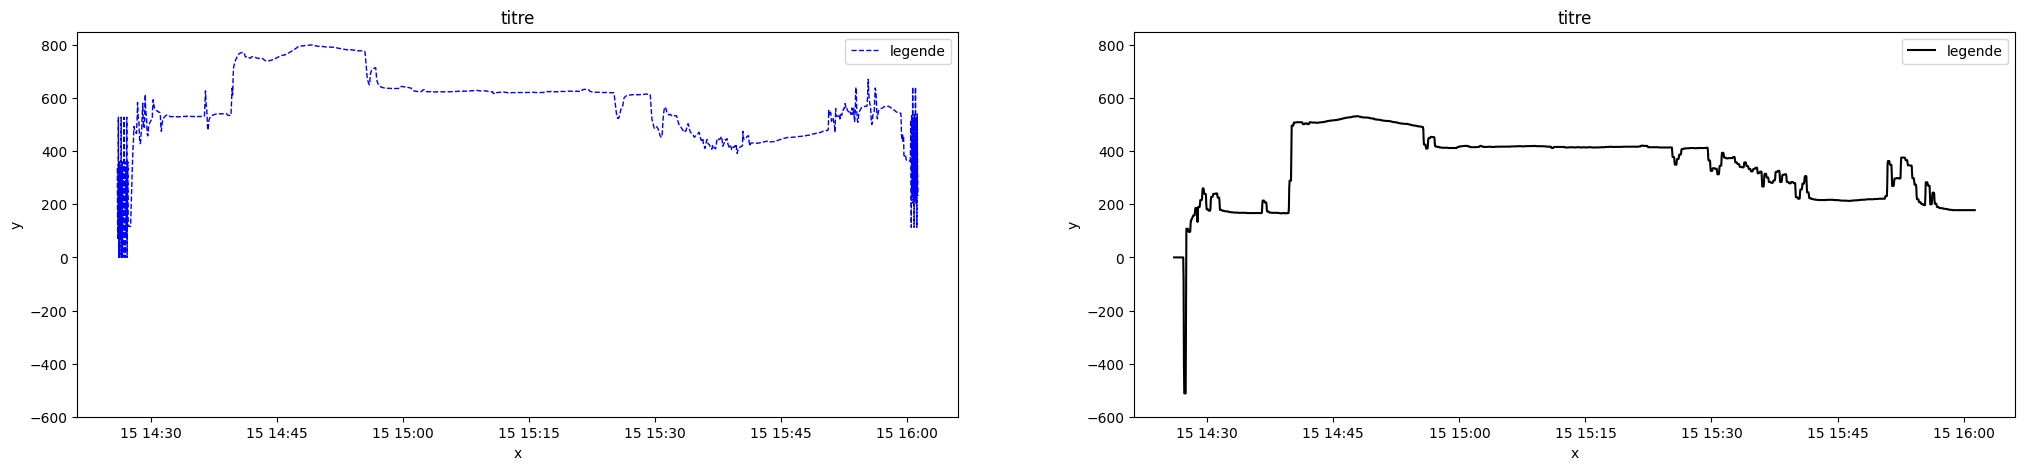

In [12]:
"""
EXERCICE - Plot avec titres et légende

Explorez la documentation de pyplot pour ajouter au graphe précédent :
1. Un titre à la figure
2. Des titres aux axes
3. Une légende
"""
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', label = "legende", linewidth=1)
plt.ylim(-600,850)
plt.title("titre")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-', label = "legende")
plt.ylim(-600,850)
plt.title("titre")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### Corrélation

Utiliser la méthode corrcoef du module numpy pour calculer la corrélation entre deux variables X et Y.

In [13]:
my_rho = np.corrcoef(vol['T3_SEL'], vol['N1_SEL'])

print(my_rho)

[[1.         0.93912182]
 [0.93912182 1.        ]]


In [14]:
len(my_rho)

2

Nuage de point entre les deux variables T3 et N1 :

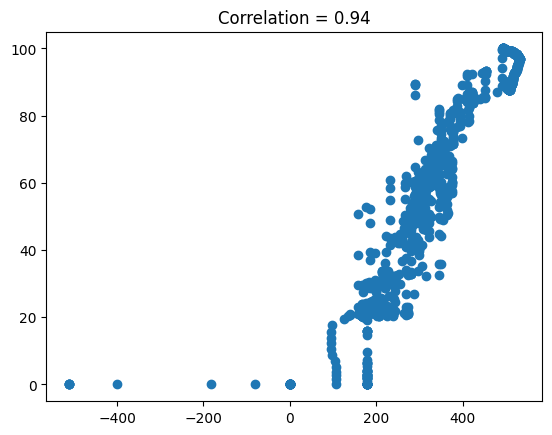

In [15]:
for i in range(1) :
    plt.scatter(vol['T3_SEL'],vol['N1_SEL'])
    plt.title('Correlation = ' + "{:.2f}".format(my_rho[0,i+1]))
    plt.show()

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

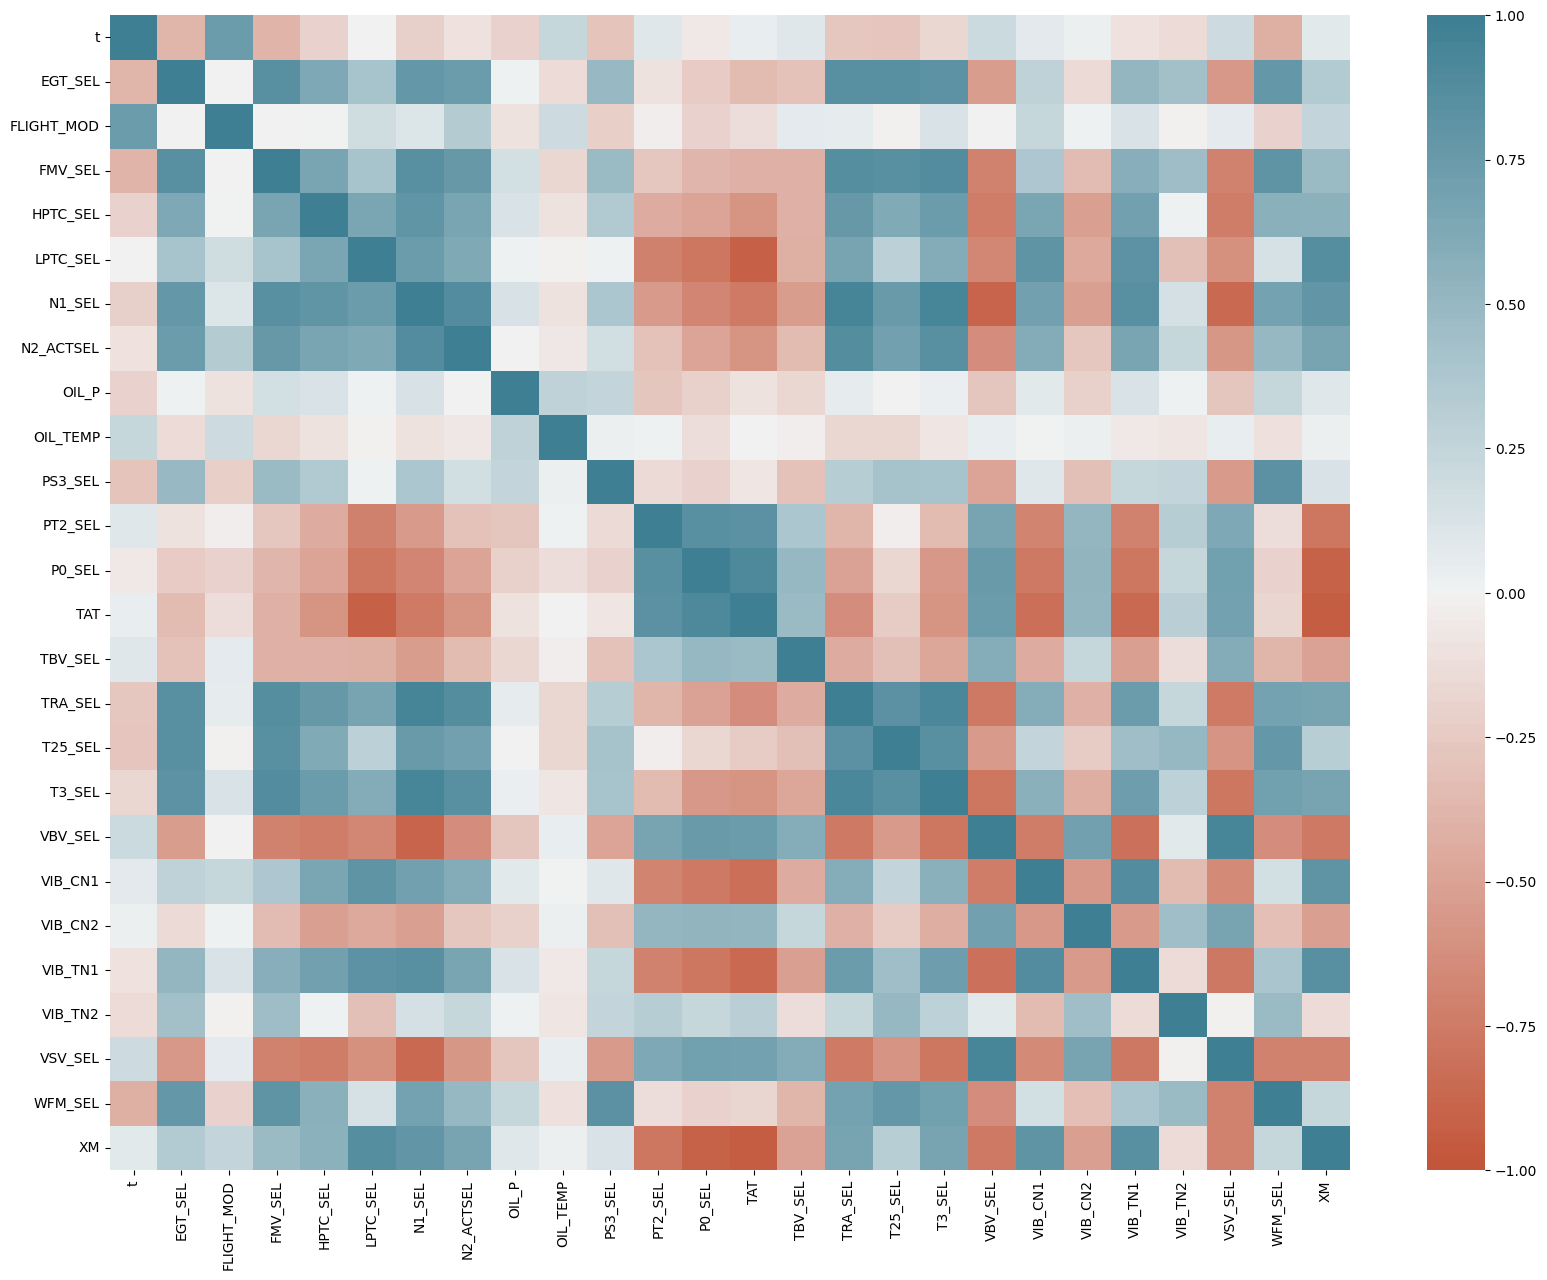

In [17]:
import seaborn as sns

# calculate the correlation matrix
corr = vol.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False, fmt='.2f', vmin=-1, vmax=1, center=0, 
        cmap=sns.diverging_palette(20, 220, n=200))

# Essayer avec annot=True

### Bar plot : temps passé dans chaque phase de vol avec `plt.bar`

Pour afficher un ensemble réduit de valeurs, le diagramme le plus adapté est le bar plot. Tout d'abord, il nous faut calculer le nombre de lignes du vol par phase de vol. La phase de vol est symbolisée par la variable `FLIGHT_MOD`. On suppose la correspondance suivante :

`FLIGHT_MOD` | Phase de vol
-------------|-------------
1 | taxi
2 | take_off
3 | begin_climb
4 | climb
5 | cruise_climb
6 | cruise
7 | descent
8 | approach
9 | flare
10 | landing

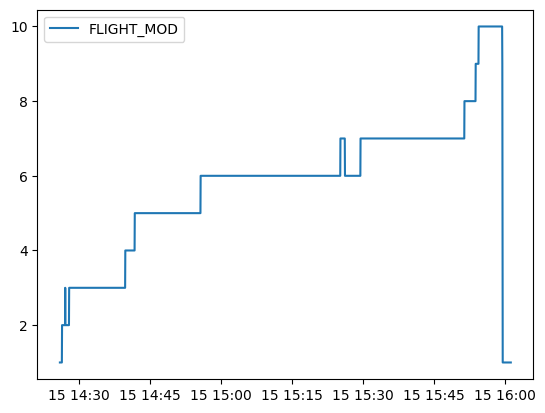

In [18]:
plt.plot(vol['t'], vol['FLIGHT_MOD'], label='FLIGHT_MOD')
plt.legend()

In [19]:
"""
EXERCICE - Correpondance FLIGHT_MOD/phase de vol
1. Créez un liste définissant la correspondance FLIGHT_MOD/phase de vol
2. Ajoutez une nouvelle colonne 'FLIGHT_PHASE' au DataFrame contenant le nom de la phase. Une possibilité est d'utiliser la méthode "apply" et une fonction anonyme (lambda).
"""
# Dictionnaire FLIGHT_MOD → phase de vol
flight_phase_dict = {
    1: 'taxi',
    2: 'take_off',
    3: 'begin_climb',
    4: 'climb',
    5: 'cruise_climb',
    6: 'cruise',
    7: 'descent',
    8: 'approach',
    9: 'flare',
    10: 'landing'
}

vol['phase'] = vol['FLIGHT_MOD'].map(flight_phase_dict)

print(vol[['FLIGHT_MOD', 'phase']].head())



   FLIGHT_MOD phase
0           1  taxi
1           1  taxi
2           1  taxi
3           1  taxi
4           1  taxi


In [20]:
vol['FLIGHT_PHASE'] = vol['FLIGHT_MOD'].apply(lambda x: flight_phase_dict.get(x, 'Unknown'))
print(vol[['FLIGHT_MOD', 'FLIGHT_PHASE']].head())


   FLIGHT_MOD FLIGHT_PHASE
0           1         taxi
1           1         taxi
2           1         taxi
3           1         taxi
4           1         taxi


In [21]:
"""
EXERCICE - Calcul du nombre de lignes par phase de vol
Groupez le DataFrame par phase de vol avec groupby() et aggrégez le résultat avec size().
"""
# Grouper par phase et compter le nombre de lignes
time_by_phase = vol.groupby('FLIGHT_PHASE').size()

# Afficher le résultat
print(time_by_phase)


FLIGHT_PHASE
approach         57
begin_climb     281
climb            48
cruise          788
cruise_climb    335
descent         550
flare            16
landing         120
take_off         35
taxi             53
dtype: int64


Voici enfin notre fameux bar plot :

<BarContainer object of 10 artists>

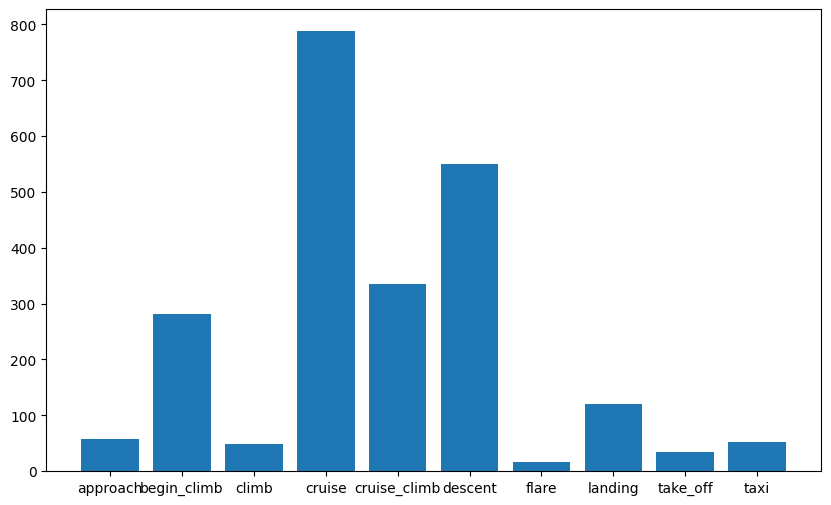

In [22]:
plt.figure(figsize=(10,6)) # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(time_by_phase.size), time_by_phase, tick_label=time_by_phase.index.tolist())

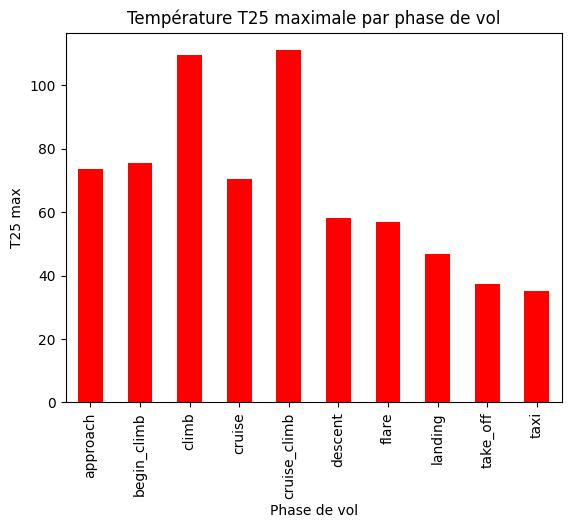

In [23]:
"""
EXERCICE - Affichez la température T25 maximale par phase de vol sur un bar plot de couleur rouge.
"""
max_T25_per_phase = vol.groupby('FLIGHT_PHASE')['T25_SEL'].max()
# Créer le bar plot
max_T25_per_phase.plot(kind='bar', color='red')

# Ajouter un titre et des labels
plt.title('Température T25 maximale par phase de vol')
plt.xlabel('Phase de vol')
plt.ylabel('T25 max')

# Afficher le graphique
plt.show()


### Pie plot : temps passé dans chaque phase de vol avec `plt.pie`

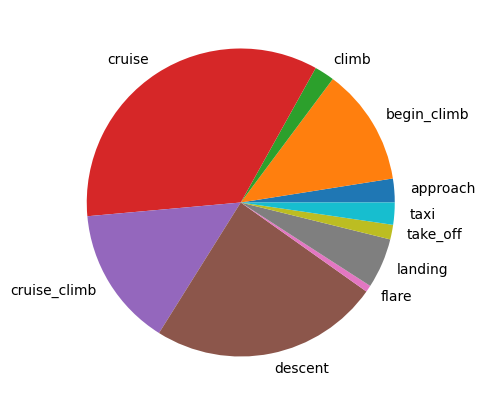

In [24]:
plt.figure(figsize=(5,5))
plt.pie(time_by_phase, labels=time_by_phase.index.tolist());

### Histogramme : représenter la distribution d'une variable

La meilleur façon de visualiser la distribution statistique d'une variable est l'histogramme. La méthode s'appelle `plt.hist()`. Étudiez sa documentation, car elle a de nombreux paramètres.

Voici un exemple avec la variable N1.

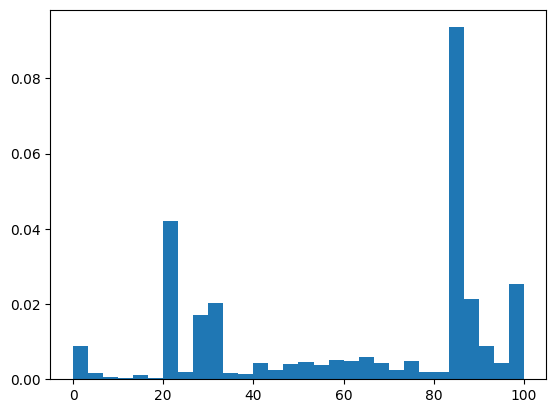

In [25]:
plt.hist(vol['N1_SEL'], bins=30, density=True); # Quel est l'effet de l'argument "density=..." ?

Beaucoup d'autres types de plots existents ! À vous de les découvrir...

## 2. Machine Learning non supervisé pour l'exploration de données avec scikit-learn

<img src="rc/scikit2.png" />

Dans cette section, on continue d'explorer le jeu de données à l'aide de techniques classique :

* PCA (Principal Component Analysis, https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales) : permet de trouver les composantes principales d'un jeu de données, correspondant aux directions orthogonales de plus grande variabilité des données. Ce directions correspondent aux vecteurs propres de la matrice de corrélation. En pratique, cette technique statistique permet de réduire la dimensionalité des données en les projectant sur les directions principales. En réduisant la dimensionalité à 2, on peut donc visualiser les données sur un plan.

<img width="300px" src="rc/PCA_fish.png" />

* $k$-means (https://fr.wikipedia.org/wiki/K-moyennes) est l'algorithme le plus répandu de _clustering_. Le clustering consiste à partitionner les données en différents groupes (appelés _clusters_), en maximisant la similarité _intra-cluster_ (entre les points d'un même cluster) et minimisant la similarité _inter-cluster_ (entre les points de clusters différents). Le clustering est aussi appelée classification _non supervisée_ (car on ne dispose pas d'étiquettes pour chaque classe).

<img width="300px" src="rc/cluster.png" />

Ces deux algorithmes incontournables permettent de décrire nos données et répondre aux questions suivantes :

* Quel est la distribution des données dans le plan des 2 première CP (composantes principales) ?
* Y a-t-il des groupes distincts dans nos données ?


#### 2.1. Préparation des données

Ces algorithmes requièrent des données numériques. Il faut donc éliminer du jeu de données les variables non numérique ou les transformer en variables numériques.

De plus, on essayera dans la suite de classifier les instants du vol par phase de vol en utilisant un algorithme de clustering. On élimine donc également la colonne "FLIGHT_MOD" du jeu de données.

In [26]:
"""
EXERCICE - Préparation des données
1. Quelles sont les variables non numériques dans les données de vol ?
2. Supprimez ces colonnes, ainsi que le FLIGHT_MOD, et créez une variable X_vol contenant les valeurs numériques sous forme d'array numpy (on y accède via la propriété `values`).
3. Affichez les dimensions de X_vol (nombre d'individus et de variables).
"""
# 1. Sélectionner les colonnes non numériques
non_numeric_cols = vol.select_dtypes(exclude=['number']).columns
print("Colonnes non numériques :", non_numeric_cols)

Colonnes non numériques : Index(['t', 'phase', 'FLIGHT_PHASE'], dtype='object')


Les colonnes non numériques dont les dates et les 2 colonnes q'on a crées phase et FLIGHT_PHASE

In [27]:
# 2. Supprimer les colonnes non numériques et FLIGHT_MOD si présent
cols_to_drop = list(non_numeric_cols) + ['FLIGHT_MOD']
X_vol = vol.drop(columns=cols_to_drop).values


In [28]:
print("Dimensions de X_vol :", X_vol.shape)

Dimensions de X_vol : (2283, 24)


Ensuite, il est nécessaire en analyse de données de normaliser nos données, car les différentes variables peuvent avoir des unités et plages de valeurs très différentes les unes des autres. Par exemple, certaines variables varient entre 0 et 1, d'autre, comme les températures, peuvent varier (en gros) de 0 à 1000. Pour pouvoir les rendre comparables, on utilisera la normalisation standard suivante, appelée _standardisation_ :

1. Retrait de la moyenne de chaque variable.
2. Division par l'écart-type.

Cela permet d'obtenir des variables de moyenne nulle et d'écart-type 1. Il existe bien entendu des normalisations bien plus poussées.

In [29]:
"""
EXERCICE - Standardisation
1. Normalisez le jeu de donnée X_vol comme expliqué précédemment, et stockez le résultat dans une variable X_vol_norm.
   Pour cela, utilisez les méthodes mean() et std() de numpy, en prenant garde à calculer selon les bonnes dimensions.
2. Véfifiez à la fin que X_vol_norm a bien une moyenne nulle et un écart-type égal à 1 pour toutes les variables.
3. Que renvoie `(X_vol_norm.mean(axis=0) == 0).all()` ? Pourquoi à votre avis ? Pour pailler à ce problème, documentez-vous et utilisez la méthode `np.isclose` de numpy 
   pour effectuer cette vérification.
"""
import numpy as np
# 1.
# Calcul de la moyenne et de l'écart-type par colonne (variable)
mean_X = X_vol.mean(axis=0)  # moyenne de chaque colonne
std_X = X_vol.std(axis=0)    # écart-type de chaque colonne

# Standardisation
X_vol_norm = (X_vol - mean_X) / std_X


In [30]:
# 2. Moyenne et écart-type de X_vol_norm
print("Moyenne par variable :", X_vol_norm.mean(axis=0))
print("Écart-type par variable :", X_vol_norm.std(axis=0))


Moyenne par variable : [ 6.22464070e-16 -9.95942512e-17  1.86739221e-16  0.00000000e+00
  7.46956884e-17  2.61434909e-16  2.48985628e-17 -2.61434909e-16
 -7.46956884e-17  2.24087065e-16  1.74289940e-16 -4.97971256e-17
  6.22464070e-17 -9.95942512e-17 -2.48985628e-17  2.48985628e-17
  1.24492814e-17  4.97971256e-17  0.00000000e+00 -4.97971256e-17
  7.46956884e-17  2.48985628e-17  9.95942512e-17 -3.48579879e-16]
Écart-type par variable : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
# 3. Vérification stricte avec == 0 (problème : flottants ≈ 0 mais pas exactement)
print((X_vol_norm.mean(axis=0) == 0).all())  # souvent False à cause des arrondis

# Vérification correcte avec np.isclose
print(np.isclose(X_vol_norm.mean(axis=0), 0).all())  # True si toutes les moyennes sont proches de 0

# Explication
print("Les calculs sur des nombres flottants ne donnent pas exactement zéro, même après standardisation.")

print("np.isclose(a, b) permet de vérifier si a et b sont suffisamment proches, ce qui est la bonne pratique pour des vérifications numériques.")

False
True
Les calculs sur des nombres flottants ne donnent pas exactement zéro, même après standardisation.
np.isclose(a, b) permet de vérifier si a et b sont suffisamment proches, ce qui est la bonne pratique pour des vérifications numériques.


On ne ré-invente pas la roue : scikit-learn propose déjà un ensemble de méthodes de normalisation dans son module de prétraitement, `sklearn.preprocessing`.

In [32]:
from sklearn.preprocessing import StandardScaler
X_vol_norm2 = StandardScaler().fit_transform(X_vol)

In [33]:
"""
EXERCICE - La résultat est-il bien identique ?
"""
print("Moyenne par variable :", X_vol_norm2.mean(axis=0))
print("Écart-type par variable :", X_vol_norm2.std(axis=0))
print("Le résultat semble bien être identique")

Moyenne par variable : [ 6.22464070e-16 -9.95942512e-17  1.86739221e-16  0.00000000e+00
  7.46956884e-17  2.61434909e-16  2.48985628e-17 -2.61434909e-16
 -7.46956884e-17  2.24087065e-16  1.74289940e-16 -4.97971256e-17
  6.22464070e-17 -9.95942512e-17 -2.48985628e-17  2.48985628e-17
  1.24492814e-17  4.97971256e-17  0.00000000e+00 -4.97971256e-17
  7.46956884e-17  2.48985628e-17  9.95942512e-17 -3.48579879e-16]
Écart-type par variable : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Le résultat semble bien être identique


#### 2.2. PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
vol_pca = PCA(n_components=2).fit(X_vol_norm)

#### 2.2.1. Étude de la variance expliquée

Le modèle PCA permet d'obtenir la part de variance des données expliquée par les différentes CP. En général, on garde autant de CP que nécessaire pour expliquer au total par exemple 90% ou 95% de la variance des données, afin de limiter la perte d'information. Ici, on en conserve 2 pour des raisons de visualisation.

In [36]:
"""
EXERCICE - Étude de la variance expliquée
1. Affichez les parts de variance expliquées par les 2 premières CP à l'aide de la propriété `explained_variance_ratio_` du modèle PCA. Faites varier le nombres de CP (3, 4... 25).
   Affichez les résultats en %.
2. Quel est le pourcentage de variance expliquée par les 2 premières CP ? Est-il cohérent de ne conserver que ces 2 dimensions ?
   Combien de composantes faudrait-il garder pour expliquer 90% de la variance ? 95% ?
3. Tracez un bar plot de la variance expliquée par chaque CP, en n'oubliant pas le titre, les noms des axes et les étiquettes sur l'axe des abscisses ('PC1', 'PC2', etc.).
   Essayez avec une échelle logarithmique.
"""

# PCA avec 2 composantes pour visualisation
pca2 = PCA(n_components=2)
pca2.fit(X_vol_norm)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [37]:
# Part de variance expliquée
explained_var_ratio_2 = pca2.explained_variance_ratio_
print("Variance expliquée par les 2 premières CP (en %) :", explained_var_ratio_2 * 100)

for n in [3, 4, 5, 10, 24]:
    pca = PCA(n_components=n)
    pca.fit(X_vol_norm)
    explained_var_ratio = pca.explained_variance_ratio_
    print(f"{n} CP : {explained_var_ratio*100}")

Variance expliquée par les 2 premières CP (en %) : [53.96958966 16.9041844 ]
3 CP : [53.96958966 16.9041844   7.48761584]
4 CP : [53.96958966 16.9041844   7.48761584  4.80046664]
5 CP : [53.96958966 16.9041844   7.48761584  4.80046664  3.62746342]
10 CP : [53.96958966 16.9041844   7.48761584  4.80046664  3.62746342  2.91061636
  2.26135499  1.78054897  1.21636542  1.10376163]
24 CP : [5.39695897e+01 1.69041844e+01 7.48761584e+00 4.80046664e+00
 3.62746342e+00 2.91061636e+00 2.26135499e+00 1.78054897e+00
 1.21636542e+00 1.10376163e+00 7.99395647e-01 6.31575797e-01
 4.96678050e-01 4.71260984e-01 3.86182951e-01 2.66302843e-01
 2.07813371e-01 1.73192401e-01 1.52827430e-01 1.27859834e-01
 1.03466394e-01 6.91747768e-02 4.29311151e-02 9.37107520e-03]


2) La variance cumulée pour les deux premières composantes est :
53,97 % + 16,90 % = 70,87 %
70.87 % de la variance totale est expliquée par les 2 premières CP.

Cela signifie que ces deux dimensions capturent environ 71 % de l’information totale dans les données.

Est-il cohérent de ne conserver que 2 dimensions ?

Pour visualisation, oui : on peut souvent se contenter des 2 premières CP pour voir les tendances globales.

Pour analyse complète, 2 dimensions ne suffisent pas si on veut garder 90 % ou 95 % de la variance.

Il faudra alors garder plus de composantes

In [38]:
pca = PCA().fit(X_vol_norm)  # PCA sur toutes les composantes
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance cumulée par CP :", cumulative_variance*100)

# Nombre de CP pour expliquer 90% ou 95% de la variance
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"CP nécessaires pour 90% variance : {n_90}")
print(f"CP nécessaires pour 95% variance : {n_95}")

Variance cumulée par CP : [ 53.96958966  70.87377405  78.36138989  83.16185653  86.78931995
  89.69993631  91.96129131  93.74184027  94.9582057   96.06196733
  96.86136298  97.49293877  97.98961682  98.46087781  98.84706076
  99.1133636   99.32117697  99.49436937  99.6471968   99.77505664
  99.87852303  99.94769781  99.99062892 100.        ]
CP nécessaires pour 90% variance : 7
CP nécessaires pour 95% variance : 10


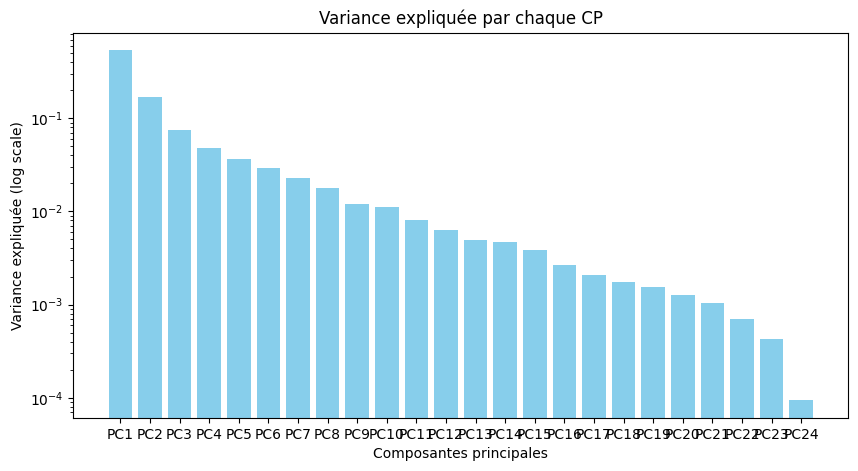

In [39]:
# 3. Bar plot pour toutes les CP
pca_full = PCA().fit(X_vol_norm)
explained_var_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.bar(range(1, len(explained_var_ratio)+1), explained_var_ratio, color='skyblue')
plt.yscale('log')  # échelle logarithmique
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée (log scale)')
plt.title('Variance expliquée par chaque CP')
plt.xticks(ticks=range(1, len(explained_var_ratio)+1),
           labels=[f'PC{i}' for i in range(1, len(explained_var_ratio)+1)])
plt.show()


#### 2.2.2. Projection et visualisation

À présent, on projette les données sur les 2 premières CP pour les visualiser sur un scatter plot. La projection s'effectue :

* par produit matriciel avec les composantes principales, contenues dans l'array `vol_pca.components_`
* via la méthode `transform(...)` du modèle PCA

In [40]:
"""
EXERCICE - Projection et visualisation par PCA.
1. Projettez les données sur les 2 premières CP.
2. Affichez le résultat sur un scatter plot. Que représente chaque point ? Que représentent les axes ? 
3. Étant donné que notre jeu de données est une série temporelle, il serait intéressant de visualiser la trajectoire du vol dans le plan de la PCA.
   Proposez et mettez en œuvre une solution permettant de visualiser cet aspect temporel sur le scatter plot.
   
"""
# Composantes principales
components = vol_pca.components_[:2]  # deux premières CP

# Projection manuelle : X_vol_norm @ components.T
X_proj_manual = X_vol_norm @ components.T
X_proj_manual

array([[-4.24439257, -2.35488316],
       [-6.38519851, -5.74327219],
       [-6.38451335, -5.74402326],
       ...,
       [-3.81570173,  2.29445001],
       [-5.96799218, -1.4051758 ],
       [-6.13952162, -1.73664194]], shape=(2283, 2))

In [41]:
X_proj = vol_pca.transform(X_vol_norm)  # projection sur toutes les CP
X_proj_2D = X_proj[:, :2]  # ne garder que les 2 premières CP
X_proj_2D

array([[-4.24439257, -2.35488316],
       [-6.38519851, -5.74327219],
       [-6.38451335, -5.74402326],
       ...,
       [-3.81570173,  2.29445001],
       [-5.96799218, -1.4051758 ],
       [-6.13952162, -1.73664194]], shape=(2283, 2))

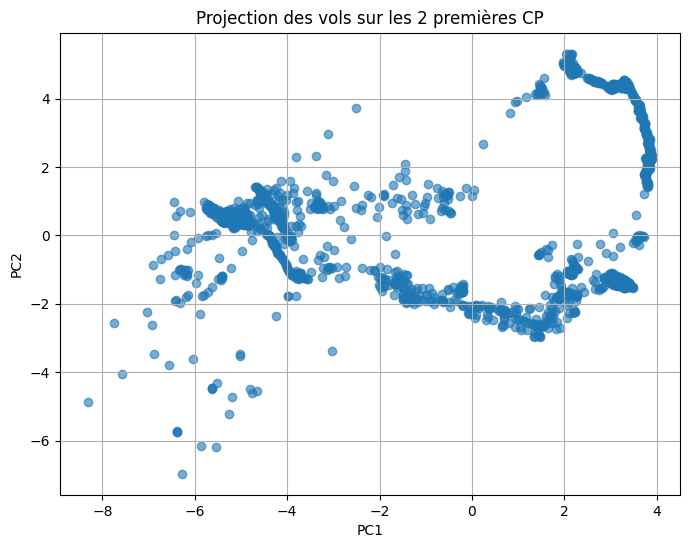

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X_proj_2D[:,0], X_proj_2D[:,1], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des vols sur les 2 premières CP')
plt.grid(True)
plt.show()


Explications :

Chaque point représente un instant/observation du vol.

Les axes représentent les deux premières composantes principales, c’est-à-dire les directions qui expliquent le plus de variance dans les données.

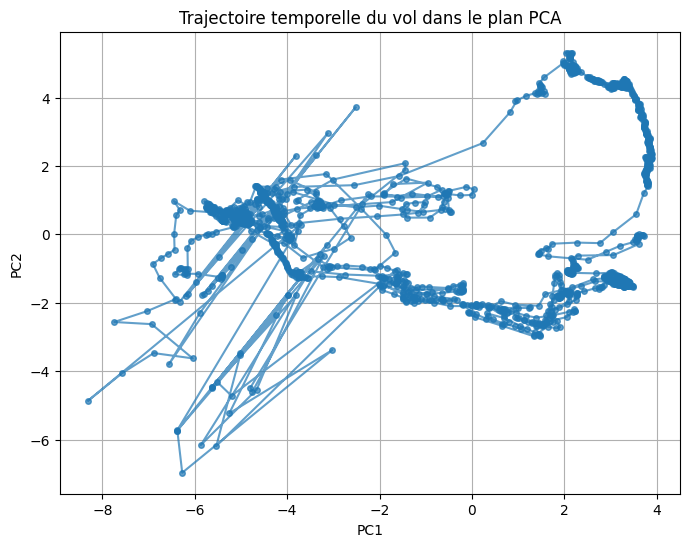

In [43]:
plt.figure(figsize=(8,6))
plt.plot(X_proj_2D[:,0], X_proj_2D[:,1], marker='o', markersize=4, linestyle='-', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Trajectoire temporelle du vol dans le plan PCA')
plt.grid(True)
plt.show()


Ressource utile : les color maps matplotlib https://matplotlib.org/users/colormaps.html

Text(0.5, 1.0, 'Projection PCA du vol avec phases de vol')

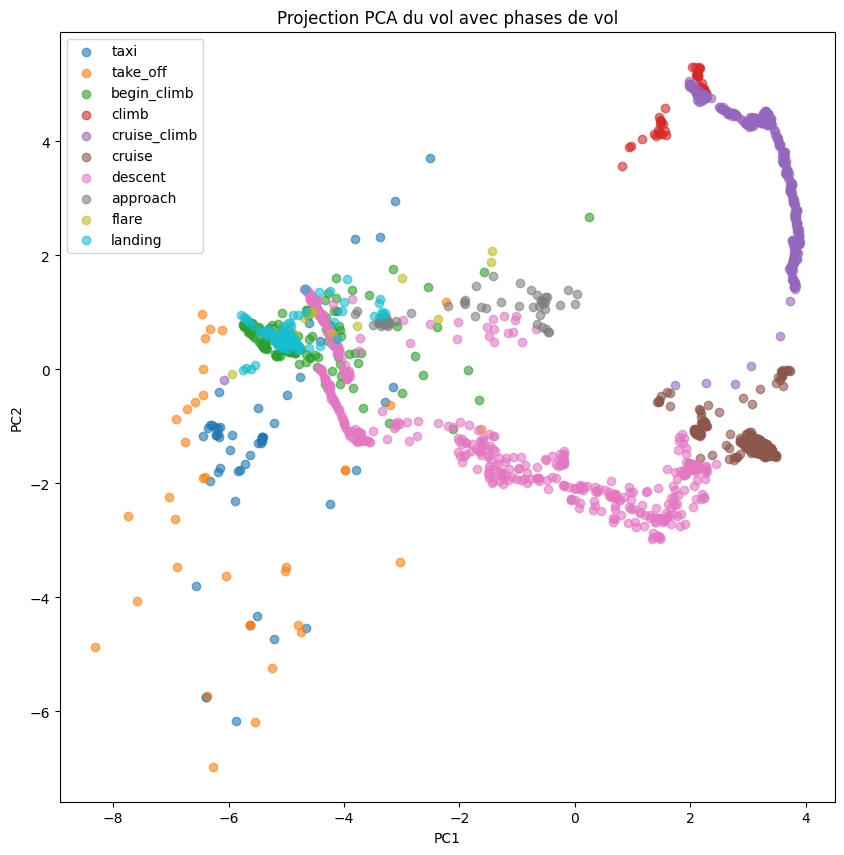

In [44]:
"""
EXERCICE - Projection et visualisation par PCA avec affichage de la phase de vol.
Complétez le code matplotlib suivant afin de de colorer les points par phase de vol, avec une légende.
"""
plt.figure(figsize=(10,10))
# Liste des phases uniques
phases = vol['FLIGHT_PHASE'].unique()
for phase in phases:
    # Filtrer les indices correspondant à cette phase
    indices = vol['FLIGHT_PHASE'] == phase
    # Extraire les points projetés correspondants
    data = X_proj_2D[indices, :]
    # Scatter plot pour cette phase
    plt.scatter(data[:, 0], data[:, 1], label=phase, alpha=0.6)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA du vol avec phases de vol')

#### 2.3. $k$-means

L'algorithme $k$-means est disponible dans le module `sklearn.clustering`, au côté d'autres algorithmes de clustering. 

In [45]:
from sklearn.cluster import KMeans

#### 2.3.1. Apprentissage et visualisation des résultats

In [46]:
"""
EXERCICE - k-means clustering
1. Instanciez un modèle k-means avec 10 centroïdes.
2. Apprenez le modèle sur le jeu de données `X_vol_norm` et récupérez les étiquettes des clusters via la méthode de prédiction.
3. Créez une figure composée de 2 graphiques.
   3.1. Sur le graphique 1, affichez le nombre d'éléments par cluster sur un bar plot (indice : la méthode `bincount` de nummy évitera d'écrire une boucle).
   3.2. SUr le graphique 2, affichez un scatter plot de la projection PCA en colorant les points par cluster.
4. Interprétez le résultat. Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?
"""

# 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)

# Apprentissage
kmeans.fit(X_vol_norm)

# Récupérer les labels (étiquettes de clusters)
labels = kmeans.labels_


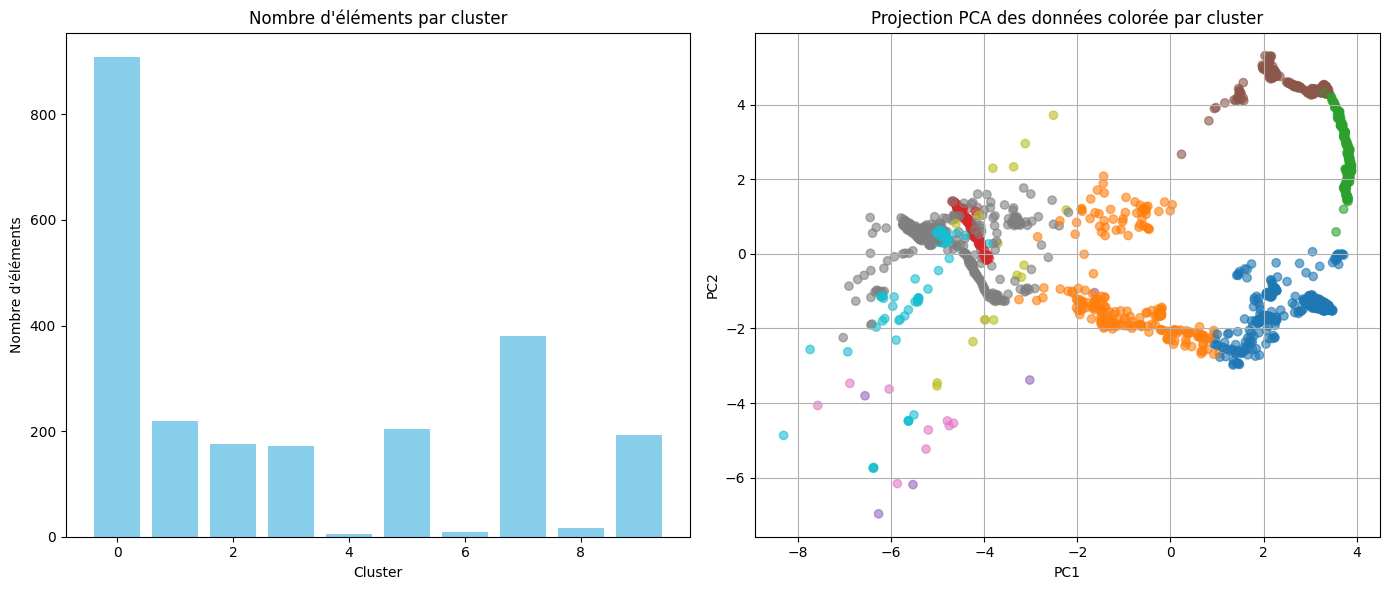

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# --- Graphique 1 : nombre d'éléments par cluster ---
plt.subplot(1, 2, 1)
counts = np.bincount(labels)
plt.bar(range(len(counts)), counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'éléments')
plt.title('Nombre d\'éléments par cluster')

# --- Graphique 2 : scatter plot PCA coloré par cluster ---
plt.subplot(1, 2, 2)
plt.scatter(X_proj_2D[:,0], X_proj_2D[:,1], c=labels, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA des données colorée par cluster')
plt.grid(True)

plt.tight_layout()
plt.show()


3) Explication

Graphique 1 : montre la répartition du nombre d’observations dans chaque cluster. Certains clusters peuvent être plus peuplés que d’autres.

Graphique 2 : visualisation des clusters dans le plan des 2 premières CP.

Chaque couleur représente un cluster différent.

Les clusters regroupent des points similaires dans l’espace des variables normalisées.

4) Interprétation

K-means ne connaît pas les phases de vol.

Il peut arriver que certains clusters correspondent partiellement à une phase, surtout si les caractéristiques sont distinctes entre phases (ex. taxi vs cruise).

Mais en général, il n’y aura pas une correspondance parfaite cluster ↔ phase de vol, car k-means se base uniquement sur la proximité dans l’espace des variables, pas sur l’information temporelle ou la phase réelle.

#### 2.3.2. Calcul de la pureté du clustering

On souhaite maintenant répondre plus en détail à la question :
    
> Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?

On commence par évaluer la capacité de notre modèle à trouver des clusters **homogènes par rapport à une variable cible**. Ici, notre variable cible sera la phase de vol. On cherche donc à mesurer si les clusters contiennent des points appartenant à une même phase de vol. Pour cela, on utilise un **indice de qualité de clustering** appelé **pureté** (_purity_). 

La pureté se calcule de la manière suivante :

1. On associe à tous les points d'un cluster la classe (i.e. la variable cible) la plus fréquente au sein de ce cluster.
2. On divise le nombre de points correctement associés à leur cluster par le nombre total de points.

Pour un partitionnement $\mathbf{Q} = \{Q_k\}, k = 1 \ldots K$ et en notant $\mathbf{Y} = \{Y_j\}, j = 1 \ldots C$ l'ensemble des points appartenant à chaque classe, on a :
\begin{equation}
    purity(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \sum_{k=1}^K \underset{j = 1 \ldots C}{\max} |Q_k \cap Y_j|
\end{equation}

In [48]:
"""
EXERCICE - Calcul de la pureté
1. Implémentez une fonction calculant la pureté d'un clustering à partir des labels et des valeurs de la variable cible. 
2. Quelle la pureté du modèle avec 10 clusters ?
"""
from sklearn.preprocessing import LabelEncoder

def cluster_purity(labels, targets):
    """
    Calcule la pureté d'un clustering.
    
    labels : array-like, labels du clustering pour chaque point
    targets : array-like, variable cible (ici phases de vol)
    
    Retourne :
        pureté (float)
    """
    labels = np.array(labels)
    targets = np.array(targets)
    N = len(labels)
    purity_sum = 0
    # Boucle sur chaque cluster
    for cluster_id in np.unique(labels):
        # indices des points dans ce cluster
        indices = np.where(labels == cluster_id)[0]
        cluster_targets = targets[indices]
        # classe la plus fréquente dans ce cluster
        if len(cluster_targets) > 0:
            most_common_count = np.max(np.bincount(cluster_targets))
            purity_sum += most_common_count

    purity = purity_sum / N
    return purity


# Encoder les phases de vol en entiers
le = LabelEncoder()
targets_encoded = le.fit_transform(vol['FLIGHT_PHASE'])

pur = cluster_purity(labels, targets_encoded)
print('Pureté : {:f} %'.format(pur*100))

Pureté : 77.266754 %


In [49]:
"""
EXERCICE - Effet du nombre de clusters sur la pureté
1. Faites varier le nombre de clusters de k-means. Quel est l'effet sur la pureté ?
2. Tracez la pureté en fonction du nombre de clusters pour quelques valeurs de ce nombre (par exemple K=1, 2, 3, 5, 10, 20, 30, 50).
3. Quelle est, à votre avis, la "meilleure" valeur de K ? Que peut-on en conclure ?
"""


'\nEXERCICE - Effet du nombre de clusters sur la pureté\n1. Faites varier le nombre de clusters de k-means. Quel est l\'effet sur la pureté ?\n2. Tracez la pureté en fonction du nombre de clusters pour quelques valeurs de ce nombre (par exemple K=1, 2, 3, 5, 10, 20, 30, 50).\n3. Quelle est, à votre avis, la "meilleure" valeur de K ? Que peut-on en conclure ?\n'

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encoder les phases de vol en entiers si ce n'est pas déjà fait
le = LabelEncoder()
targets_encoded = le.fit_transform(vol['FLIGHT_PHASE'])

cluster_numbers = [1, 2, 3, 5, 10, 20, 30, 50]
purity_scores = []

for K in cluster_numbers:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_vol_norm)
    labels = kmeans.labels_
    
    pur = cluster_purity(labels, targets_encoded)
    purity_scores.append(pur)

purity_scores


[np.float64(0.3451598773543583),
 np.float64(0.4967148488830486),
 np.float64(0.49846692947875604),
 np.float64(0.648269820411739),
 np.float64(0.7726675427069645),
 np.float64(0.8646517739816032),
 np.float64(0.8756022777047744),
 np.float64(0.9137100306614104)]

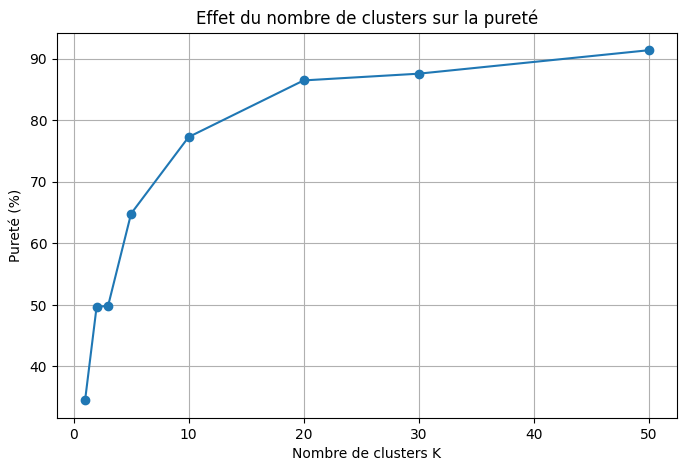

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(cluster_numbers, np.array(purity_scores)*100, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Pureté (%)')
plt.title('Effet du nombre de clusters sur la pureté')
plt.grid(True)
plt.show()


3)

Tendance générale : la pureté augmente lorsque K augmente.

Pourquoi ? : plus de clusters → plus de chances que chaque cluster contienne des points d’une seule phase.

Limite : si K = nombre d’observations, la pureté sera 100 %, mais ce n’est pas utile.

Choix de K “optimal” :

Chercher un compromis entre pureté élevée et nombre raisonnable de clusters.

Exemple : K autour de 20 peut donner une pureté relativement bonne tout en gardant des clusters significatifs.

Conclusion : plus de clusters → meilleure pureté, mais attention à l’interprétabilité et au sur-clustering.

#### 2.3.3. Calcul de la précision de classification non supervisée (_unsupervised clustering accuracy_)

Enfin, on souhaite évaluer la performance de notre modèle en tant que classificateur.

**Note** : cette approche n'a de sens que si le nombre de clusters est égal au nombre de classes de la variable cible !

Pour ce faire, nous allons passer par une métrique appelée **unsupervised clustering accuracy**. Celle-ci correspond à la précision de classification (i.e. proportion de points correctement classifiés), mais dans un cadre non supervisé. Cette métrique mesure la capacité à partitionner les données selon les différentes modalités d'une variable cible. La question est donc de mesurer la capacité du modèle $k$-means à partitionner les données selon la phase de vol.

Cette métrique s'écrit :
\begin{equation}
    acc(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \underset{m}\max \sum_{k=1}^K |Q_k \cap Y_{m(k)}|
\end{equation}

où on cherche la meilleure association $m$ (_mapping_) deux à deux entre clusters et classes (dans notre cas, l'association entre Cluster 0, Cluster 1, etc. et les phases de vol taxi, take_off, etc.).

Pour calculer cette meilleur association, un algorithme efficace est la _méthode Hongroise_ ou algorithme de Kuhn-Munkres. Celui-ci est disponible dans le module de scipy `scipy.optimize.linear_sum_assignment`.

In [52]:
from scipy.optimize import linear_sum_assignment

In [53]:
def cluster_acc(labels, targets):
    assert labels.size == targets.size
    D = max(labels.max(), targets.max()) + 1
    w = np.zeros((D, D))
    for i in range(labels.size):
        w[labels[i], targets[i]] += 1
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    return w[row_ind, col_ind].sum() * 1.0 / labels.size

acc = cluster_acc(labels, vol['FLIGHT_MOD'])
print('Accuracy : {:f} %'.format(acc*100))

Accuracy : 52.212002 %


#### Test Khi-2

Découvrir la library scipy pour effectuer le test de chi-deux d'indépendance des variables dans un tableau de contingence.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

scipy.stats.chi2_contingency : fonction permet de calculer le score de khi-2 et la p-value pour le test d'hypothèse d'indépendance des fréquences observées. 

In [54]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)

In [55]:
git remote add origin https://github.com/Kyouma0/Td-statistiques-descriptive.git

SyntaxError: invalid syntax (2985891382.py, line 1)

In [ ]:
git add